# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

**NOTE: This solution draws heavily from DCGAN example from class materials available at <br>
https://github.com/udacity/deep-learning/blob/master/dcgan-svhn/DCGAN.ipynb**

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

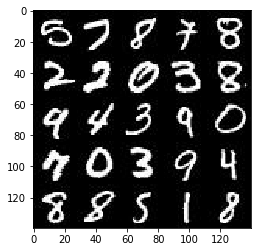

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

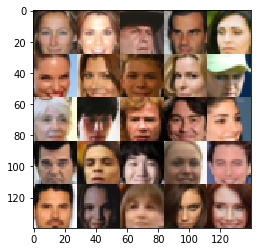

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

**Dimensionality Help (from class)**  <br>
From what we've learned so far, how can we calculate the number of neurons of each layer in our CNN?

Given:

our input layer has a width of W and a height of H <br>
our convolutional layer has a filter size F  <br>
we have a stride of S  <br>
a padding of P  <br>
and the number of filters K,  <br>
the following formula gives us the width of the next layer: W_out = (W−F+2P)/S+1.  <br>

The output height would be H_out = (H-F+2P)/S + 1.

And the output depth would be equal to the number of filters D_out = K.

The output volume would be W_out * H_out * D_out.

Knowing the dimensionality of each additional layer helps us understand how large our model is and how our decisions around filter size and stride affect the size of our network.

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #return None, None
 
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        '''
        Example:
        # Input layer is 32x32x3 
        x1 = tf.layers.conv2d(x, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        Calculation:
            W=32, H=32, F=5, S=2, K=64, P=?... we don't know P, would need to calculate....
            # from tensorflow https://www.tensorflow.org/api_guides/python/nn#Convolution
            out_height = ceil(float(in_height) / float(strides[1])) = ceil(32/2)=16
            out_width  = ceil(float(in_width) / float(strides[2])) = ceil(32/2)=16
        '''
        
        ''' 
        input from reviewer
        Use weight initialization: Xavier initialization is recommended as it helps model converge faster. 
        A possible implementation in tensorflow is to pass tf.contrib.layers.xavier_initializer() as the 
        value for the kernel_initializer parameter in tf.layers.conv2d
        '''
        
        # Input layer is 28x28x3 
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',\
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same',\
                             kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same',\
                             kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        '''
        Input from reviewer
        Use Dropouts in discriminator so as to make it more robust. A possible implementation in 
        tensorflow can be achieved by simply passing the outputs from the last layer into the 
        tf.nn.dropout with a high keep_probability.
        '''
        return tf.nn.dropout(out, 0.9), tf.nn.dropout(logits, 0.9)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function   
    #return None

    #print(out_channel_dim)
    alpha = 0.2
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.get_shape())
        # 2x2x512 now
        
        ''' 
        input from reviewer
        Use weight initialization: Xavier initialization is recommended as it helps model converge faster. 
        A possible implementation in tensorflow is to pass tf.contrib.layers.xavier_initializer() as the 
        value for the kernel_initializer parameter in tf.layers.conv2d
        '''
            
        # from quora: 
        # https://www.quora.com/How-do-you-calculate-the-output-dimensions-of-a-deconvolution-network-layer
        # So=stride(Si−1)+Sf−2∗pad
        # "where So means output size, Si input size, Sf the filter size. 
        # It is just the ‘opposite’ operation of the convolution (basically exchange the forward and backward pass)"
        # So = 2(2-1)+5*1 = 7
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid',\
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.get_shape())
        # 7x7x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',\
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.get_shape())
        # 14x14x128 now
        
        # Output layer
        #logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same',\
                                           kernel_initializer=tf.contrib.layers.xavier_initializer())
        out = tf.tanh(logits)
        # 28x28xout_channel_dim now
        
        '''
        Input from reviewer 
        Similar to the discriminator, use Dropouts in the generator at both train and test time with 
        keep_probability as 0.5 as suggested here.
        - this didn't work so well... reverting back to no dropout...
        return tf.nn.dropout(out, 0.5)
        '''
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #return None, None

    alpha=0.2
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    '''
    Feedback from reviewer
    I would recommend you to multiply labels (for d_loss_real) by a smoothing factor (0.9, for instance). 
    This helps optimizing this loss for the following reason: initially the generator network does not produce 
    anything close to the real input images; hence, the discriminator quickly learns to distinguish between real 
    inputs and generated inputs - outputting a probability close to 1; hence cross-entropy loss will involve the 
    following computation: log(some_very_small_number), which can be unstable.
    '''
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #return None, None

    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # def __init__(self, real_size, z_size, learning_rate, alpha=0.2, beta1=0.5):
    
    exploring = False
    if exploring:
        print(batch_size)
        print(z_dim)
        print(get_batches)
        print(data_shape)
        print(data_image_mode)
    
    #tf.reset_default_graph()
    
    if exploring: print('here0')
    #def model_inputs(image_width, image_height, image_channels, z_dim): return inputs_real, inputs_z, learning_rate
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    if exploring: print('here1')
    #def model_loss(input_real, input_z, out_channel_dim): return d_loss, g_loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    
    if exploring: print('here2')
    #def model_opt(d_loss, g_loss, learning_rate, beta1): return d_train_opt, g_train_opt
    d_opt, g_opt = model_opt(d_loss, g_loss, l_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    
    if exploring: print('here3')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                '''
                Feedback from review
                In the notebook there is a description of the "faces" dataset - it says that the values in the 
                matrix lie in [-0.5, 0.5] range. But your generator produces output in the range [-1, 1] 
                (due to application of tf.tanh). Hence, you need to multiply batch_images by 2 to achieve the same 
                scale. This fix will DRAMATICALLY improve your model's performance.
                '''
                batch_z = batch_z * 2
                
                # Run optimizers
                #_ = sess.run(net.d_opt, feed_dict={net.input_real: x, net.input_z: batch_z})
                #_ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: x})
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, l_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, l_rate: learning_rate})
                
                if exploring: print(steps)
                    
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)   
            

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7392... Generator Loss: 1.2903
Epoch 1/2... Discriminator Loss: 0.7138... Generator Loss: 1.6550
Epoch 1/2... Discriminator Loss: 0.6124... Generator Loss: 1.9885
Epoch 1/2... Discriminator Loss: 0.6497... Generator Loss: 2.2055
Epoch 1/2... Discriminator Loss: 0.5809... Generator Loss: 2.4924
Epoch 1/2... Discriminator Loss: 0.6505... Generator Loss: 2.6063
Epoch 1/2... Discriminator Loss: 0.9158... Generator Loss: 2.9095
Epoch 1/2... Discriminator Loss: 0.6558... Generator Loss: 2.6176
Epoch 1/2... Discriminator Loss: 0.7302... Generator Loss: 1.5315
Epoch 1/2... Discriminator Loss: 0.5536... Generator Loss: 2.4577


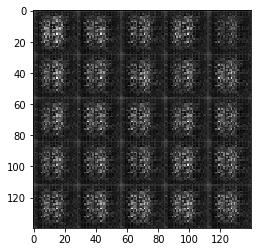

Epoch 1/2... Discriminator Loss: 0.7008... Generator Loss: 1.4464
Epoch 1/2... Discriminator Loss: 0.6683... Generator Loss: 2.2385
Epoch 1/2... Discriminator Loss: 0.6041... Generator Loss: 7.1943
Epoch 1/2... Discriminator Loss: 0.5148... Generator Loss: 3.1871
Epoch 1/2... Discriminator Loss: 0.5719... Generator Loss: 2.1401
Epoch 1/2... Discriminator Loss: 0.5461... Generator Loss: 2.5960
Epoch 1/2... Discriminator Loss: 0.4791... Generator Loss: 2.9009
Epoch 1/2... Discriminator Loss: 0.4787... Generator Loss: 2.8227
Epoch 1/2... Discriminator Loss: 0.4923... Generator Loss: 3.5045
Epoch 1/2... Discriminator Loss: 0.5457... Generator Loss: 2.5409


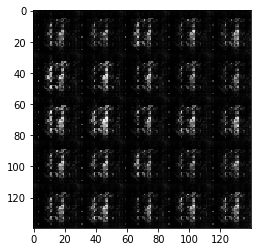

Epoch 1/2... Discriminator Loss: 0.4706... Generator Loss: 2.9421
Epoch 1/2... Discriminator Loss: 0.4606... Generator Loss: 3.2062
Epoch 1/2... Discriminator Loss: 0.5493... Generator Loss: 2.7815
Epoch 1/2... Discriminator Loss: 0.4848... Generator Loss: 3.1220
Epoch 1/2... Discriminator Loss: 0.5420... Generator Loss: 3.1848
Epoch 1/2... Discriminator Loss: 0.4154... Generator Loss: 3.6530
Epoch 1/2... Discriminator Loss: 0.4712... Generator Loss: 2.6983
Epoch 1/2... Discriminator Loss: 0.4659... Generator Loss: 3.9704
Epoch 1/2... Discriminator Loss: 0.5265... Generator Loss: 3.9224
Epoch 1/2... Discriminator Loss: 0.5145... Generator Loss: 3.6223


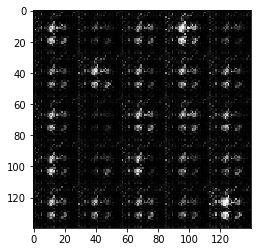

Epoch 1/2... Discriminator Loss: 0.4461... Generator Loss: 5.8613
Epoch 1/2... Discriminator Loss: 0.5477... Generator Loss: 2.5290
Epoch 1/2... Discriminator Loss: 0.5888... Generator Loss: 2.3125
Epoch 1/2... Discriminator Loss: 0.4495... Generator Loss: 3.7286
Epoch 1/2... Discriminator Loss: 0.4666... Generator Loss: 3.7102
Epoch 1/2... Discriminator Loss: 0.5579... Generator Loss: 3.6481
Epoch 1/2... Discriminator Loss: 0.4989... Generator Loss: 3.8652
Epoch 1/2... Discriminator Loss: 0.4462... Generator Loss: 3.4965
Epoch 1/2... Discriminator Loss: 0.4780... Generator Loss: 3.0802
Epoch 1/2... Discriminator Loss: 0.5404... Generator Loss: 3.0960


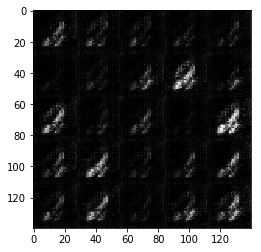

Epoch 1/2... Discriminator Loss: 0.4275... Generator Loss: 3.3185
Epoch 1/2... Discriminator Loss: 0.5009... Generator Loss: 2.9979
Epoch 1/2... Discriminator Loss: 0.4564... Generator Loss: 4.8209
Epoch 1/2... Discriminator Loss: 0.4541... Generator Loss: 4.5698
Epoch 1/2... Discriminator Loss: 0.4920... Generator Loss: 2.9616
Epoch 1/2... Discriminator Loss: 0.5067... Generator Loss: 3.8476
Epoch 1/2... Discriminator Loss: 0.5390... Generator Loss: 2.2584
Epoch 1/2... Discriminator Loss: 0.5139... Generator Loss: 3.8841
Epoch 1/2... Discriminator Loss: 0.5357... Generator Loss: 3.3340
Epoch 1/2... Discriminator Loss: 0.5186... Generator Loss: 4.1097


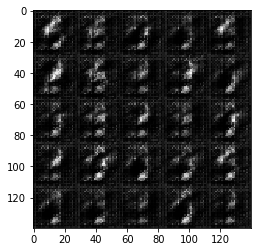

Epoch 1/2... Discriminator Loss: 0.5029... Generator Loss: 3.1983
Epoch 1/2... Discriminator Loss: 0.5166... Generator Loss: 2.6362
Epoch 1/2... Discriminator Loss: 0.6011... Generator Loss: 4.0790
Epoch 1/2... Discriminator Loss: 0.5866... Generator Loss: 2.3566
Epoch 1/2... Discriminator Loss: 0.5467... Generator Loss: 3.2398
Epoch 1/2... Discriminator Loss: 0.5603... Generator Loss: 3.5885
Epoch 1/2... Discriminator Loss: 0.4626... Generator Loss: 4.0688
Epoch 1/2... Discriminator Loss: 0.5624... Generator Loss: 3.7225
Epoch 1/2... Discriminator Loss: 0.4725... Generator Loss: 2.9404
Epoch 1/2... Discriminator Loss: 0.4745... Generator Loss: 2.9976


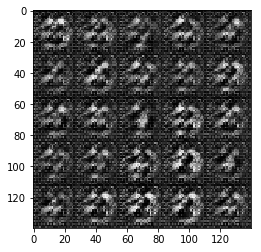

Epoch 1/2... Discriminator Loss: 0.4621... Generator Loss: 4.0256
Epoch 1/2... Discriminator Loss: 0.4702... Generator Loss: 3.5363
Epoch 1/2... Discriminator Loss: 0.4294... Generator Loss: 3.9153
Epoch 1/2... Discriminator Loss: 0.6014... Generator Loss: 3.8580
Epoch 1/2... Discriminator Loss: 0.6442... Generator Loss: 6.1642
Epoch 1/2... Discriminator Loss: 1.2150... Generator Loss: 6.5985
Epoch 1/2... Discriminator Loss: 0.5566... Generator Loss: 2.3979
Epoch 1/2... Discriminator Loss: 1.6054... Generator Loss: 7.2183
Epoch 1/2... Discriminator Loss: 0.6809... Generator Loss: 1.6181
Epoch 1/2... Discriminator Loss: 1.8211... Generator Loss: 5.4189


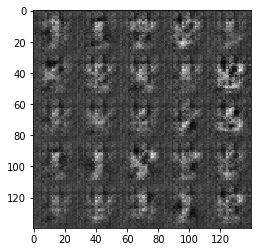

Epoch 1/2... Discriminator Loss: 1.0127... Generator Loss: 1.3314
Epoch 1/2... Discriminator Loss: 1.4817... Generator Loss: 2.2638
Epoch 1/2... Discriminator Loss: 0.9997... Generator Loss: 1.2675
Epoch 1/2... Discriminator Loss: 0.7095... Generator Loss: 1.8087
Epoch 1/2... Discriminator Loss: 0.9978... Generator Loss: 2.4372
Epoch 1/2... Discriminator Loss: 0.7426... Generator Loss: 3.1933
Epoch 1/2... Discriminator Loss: 0.8069... Generator Loss: 1.2271
Epoch 1/2... Discriminator Loss: 0.8030... Generator Loss: 1.4896
Epoch 1/2... Discriminator Loss: 0.6181... Generator Loss: 2.1593
Epoch 1/2... Discriminator Loss: 0.6702... Generator Loss: 2.7559


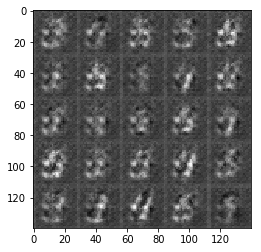

Epoch 1/2... Discriminator Loss: 0.7833... Generator Loss: 1.5655
Epoch 1/2... Discriminator Loss: 0.5779... Generator Loss: 2.0601
Epoch 1/2... Discriminator Loss: 0.6341... Generator Loss: 2.7197
Epoch 1/2... Discriminator Loss: 0.6534... Generator Loss: 1.5859
Epoch 1/2... Discriminator Loss: 0.6604... Generator Loss: 2.0957
Epoch 1/2... Discriminator Loss: 0.7152... Generator Loss: 1.5999
Epoch 1/2... Discriminator Loss: 0.5752... Generator Loss: 2.9342
Epoch 1/2... Discriminator Loss: 0.5950... Generator Loss: 2.1702
Epoch 1/2... Discriminator Loss: 0.6191... Generator Loss: 2.0148
Epoch 1/2... Discriminator Loss: 0.5246... Generator Loss: 2.4647


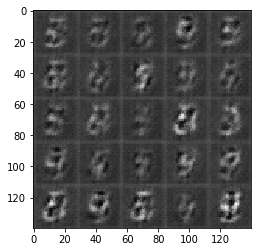

Epoch 1/2... Discriminator Loss: 0.5653... Generator Loss: 2.7859
Epoch 1/2... Discriminator Loss: 0.7281... Generator Loss: 1.5422
Epoch 1/2... Discriminator Loss: 0.7236... Generator Loss: 2.1010
Epoch 1/2... Discriminator Loss: 0.5715... Generator Loss: 2.3511
Epoch 1/2... Discriminator Loss: 0.6981... Generator Loss: 1.9082
Epoch 1/2... Discriminator Loss: 0.5760... Generator Loss: 2.6681
Epoch 1/2... Discriminator Loss: 0.5380... Generator Loss: 2.3873
Epoch 1/2... Discriminator Loss: 0.5221... Generator Loss: 2.0324
Epoch 1/2... Discriminator Loss: 0.5757... Generator Loss: 2.6127
Epoch 1/2... Discriminator Loss: 0.5890... Generator Loss: 2.3491


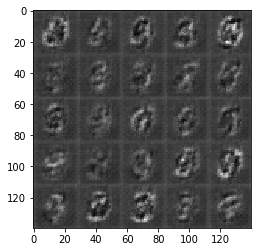

Epoch 1/2... Discriminator Loss: 0.5617... Generator Loss: 1.9596
Epoch 1/2... Discriminator Loss: 0.4731... Generator Loss: 2.4853
Epoch 1/2... Discriminator Loss: 0.5116... Generator Loss: 2.6522
Epoch 1/2... Discriminator Loss: 0.5707... Generator Loss: 2.8801
Epoch 1/2... Discriminator Loss: 0.5284... Generator Loss: 2.4767
Epoch 1/2... Discriminator Loss: 0.5442... Generator Loss: 2.2023
Epoch 1/2... Discriminator Loss: 0.6617... Generator Loss: 1.6748
Epoch 1/2... Discriminator Loss: 0.7444... Generator Loss: 1.4612
Epoch 1/2... Discriminator Loss: 0.5410... Generator Loss: 2.2358
Epoch 1/2... Discriminator Loss: 0.6878... Generator Loss: 1.7582


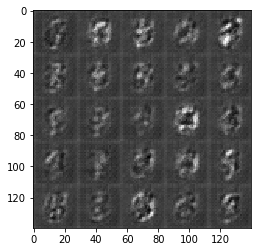

Epoch 1/2... Discriminator Loss: 0.6582... Generator Loss: 1.4135
Epoch 1/2... Discriminator Loss: 0.5741... Generator Loss: 2.9651
Epoch 1/2... Discriminator Loss: 0.7257... Generator Loss: 1.4406
Epoch 1/2... Discriminator Loss: 0.5371... Generator Loss: 3.2217
Epoch 1/2... Discriminator Loss: 0.4756... Generator Loss: 2.2829
Epoch 1/2... Discriminator Loss: 0.5350... Generator Loss: 3.2039
Epoch 1/2... Discriminator Loss: 0.5158... Generator Loss: 2.7877
Epoch 1/2... Discriminator Loss: 0.5049... Generator Loss: 3.4467
Epoch 1/2... Discriminator Loss: 0.5086... Generator Loss: 2.3654
Epoch 1/2... Discriminator Loss: 0.6469... Generator Loss: 1.7744


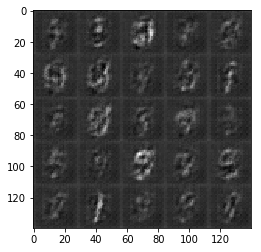

Epoch 1/2... Discriminator Loss: 1.0692... Generator Loss: 0.8965
Epoch 1/2... Discriminator Loss: 0.4475... Generator Loss: 3.0720
Epoch 1/2... Discriminator Loss: 0.5413... Generator Loss: 2.6684
Epoch 1/2... Discriminator Loss: 0.5191... Generator Loss: 2.4933
Epoch 1/2... Discriminator Loss: 0.4873... Generator Loss: 3.2721
Epoch 1/2... Discriminator Loss: 0.6002... Generator Loss: 1.9715
Epoch 1/2... Discriminator Loss: 0.5159... Generator Loss: 2.7061
Epoch 1/2... Discriminator Loss: 0.4545... Generator Loss: 3.4395
Epoch 1/2... Discriminator Loss: 0.8423... Generator Loss: 1.2534
Epoch 1/2... Discriminator Loss: 0.4613... Generator Loss: 2.4761


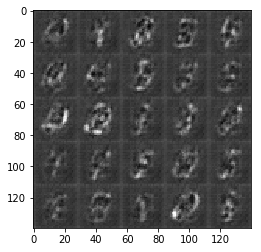

Epoch 1/2... Discriminator Loss: 0.6929... Generator Loss: 1.6599
Epoch 1/2... Discriminator Loss: 0.5164... Generator Loss: 2.7061
Epoch 1/2... Discriminator Loss: 0.5165... Generator Loss: 2.7653
Epoch 1/2... Discriminator Loss: 0.6829... Generator Loss: 1.6422
Epoch 1/2... Discriminator Loss: 0.5352... Generator Loss: 2.4380
Epoch 1/2... Discriminator Loss: 0.5481... Generator Loss: 2.8098
Epoch 1/2... Discriminator Loss: 0.4830... Generator Loss: 2.9719
Epoch 1/2... Discriminator Loss: 0.5260... Generator Loss: 2.3080
Epoch 1/2... Discriminator Loss: 0.5191... Generator Loss: 2.7915
Epoch 1/2... Discriminator Loss: 0.5303... Generator Loss: 2.6232


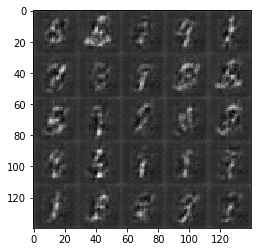

Epoch 1/2... Discriminator Loss: 0.5422... Generator Loss: 2.3293
Epoch 1/2... Discriminator Loss: 0.5605... Generator Loss: 2.4108
Epoch 1/2... Discriminator Loss: 0.4537... Generator Loss: 3.1769
Epoch 1/2... Discriminator Loss: 0.5125... Generator Loss: 2.4233
Epoch 1/2... Discriminator Loss: 0.4739... Generator Loss: 2.5280
Epoch 1/2... Discriminator Loss: 0.5434... Generator Loss: 2.0684
Epoch 1/2... Discriminator Loss: 0.6584... Generator Loss: 1.7882
Epoch 1/2... Discriminator Loss: 0.5357... Generator Loss: 1.9161
Epoch 1/2... Discriminator Loss: 0.5572... Generator Loss: 3.9290
Epoch 1/2... Discriminator Loss: 0.5795... Generator Loss: 2.3089


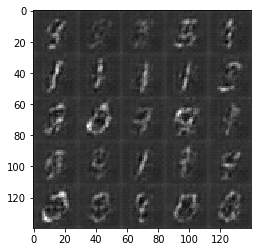

Epoch 1/2... Discriminator Loss: 0.5651... Generator Loss: 2.3173
Epoch 1/2... Discriminator Loss: 0.4702... Generator Loss: 2.7548
Epoch 1/2... Discriminator Loss: 0.4885... Generator Loss: 3.2466
Epoch 1/2... Discriminator Loss: 0.4667... Generator Loss: 2.8256
Epoch 1/2... Discriminator Loss: 0.5360... Generator Loss: 3.8544
Epoch 1/2... Discriminator Loss: 0.5310... Generator Loss: 3.0086
Epoch 1/2... Discriminator Loss: 0.4159... Generator Loss: 3.2392
Epoch 1/2... Discriminator Loss: 0.5708... Generator Loss: 1.9286
Epoch 1/2... Discriminator Loss: 0.5275... Generator Loss: 3.2526
Epoch 1/2... Discriminator Loss: 0.5609... Generator Loss: 1.9926


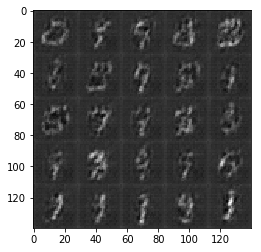

Epoch 1/2... Discriminator Loss: 0.4315... Generator Loss: 3.3177
Epoch 1/2... Discriminator Loss: 0.4511... Generator Loss: 2.8811
Epoch 1/2... Discriminator Loss: 0.5121... Generator Loss: 2.4823
Epoch 1/2... Discriminator Loss: 0.4871... Generator Loss: 2.5732
Epoch 1/2... Discriminator Loss: 0.5908... Generator Loss: 2.3058
Epoch 1/2... Discriminator Loss: 0.4391... Generator Loss: 3.1188
Epoch 1/2... Discriminator Loss: 0.5968... Generator Loss: 3.0398
Epoch 1/2... Discriminator Loss: 0.5033... Generator Loss: 2.7873
Epoch 1/2... Discriminator Loss: 0.5896... Generator Loss: 2.0296
Epoch 1/2... Discriminator Loss: 0.5994... Generator Loss: 2.0810


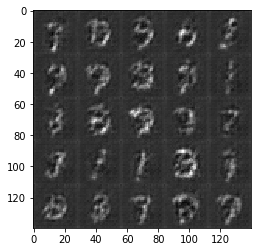

Epoch 1/2... Discriminator Loss: 0.4287... Generator Loss: 4.2532
Epoch 1/2... Discriminator Loss: 0.4371... Generator Loss: 3.3606
Epoch 1/2... Discriminator Loss: 0.7224... Generator Loss: 4.1266
Epoch 1/2... Discriminator Loss: 0.5274... Generator Loss: 2.8549
Epoch 1/2... Discriminator Loss: 0.4913... Generator Loss: 3.1843
Epoch 1/2... Discriminator Loss: 0.4548... Generator Loss: 3.5067
Epoch 1/2... Discriminator Loss: 0.5646... Generator Loss: 3.1453
Epoch 1/2... Discriminator Loss: 0.7455... Generator Loss: 1.4563
Epoch 1/2... Discriminator Loss: 0.7073... Generator Loss: 1.5383
Epoch 1/2... Discriminator Loss: 0.4814... Generator Loss: 2.5178


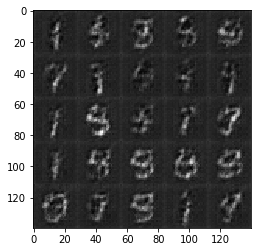

Epoch 1/2... Discriminator Loss: 0.4520... Generator Loss: 3.2421
Epoch 1/2... Discriminator Loss: 0.4894... Generator Loss: 2.6514
Epoch 1/2... Discriminator Loss: 0.5572... Generator Loss: 2.5253
Epoch 1/2... Discriminator Loss: 0.4597... Generator Loss: 2.9016
Epoch 1/2... Discriminator Loss: 0.4281... Generator Loss: 3.3578
Epoch 1/2... Discriminator Loss: 0.5021... Generator Loss: 3.4973
Epoch 1/2... Discriminator Loss: 0.6311... Generator Loss: 2.4977
Epoch 2/2... Discriminator Loss: 0.5510... Generator Loss: 2.2836
Epoch 2/2... Discriminator Loss: 0.6411... Generator Loss: 2.1762
Epoch 2/2... Discriminator Loss: 0.4906... Generator Loss: 3.7078


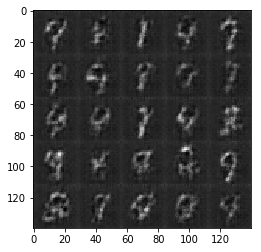

Epoch 2/2... Discriminator Loss: 0.5306... Generator Loss: 2.6379
Epoch 2/2... Discriminator Loss: 0.5181... Generator Loss: 2.2774
Epoch 2/2... Discriminator Loss: 0.4348... Generator Loss: 3.2872
Epoch 2/2... Discriminator Loss: 0.5007... Generator Loss: 3.5609
Epoch 2/2... Discriminator Loss: 0.5047... Generator Loss: 4.8545
Epoch 2/2... Discriminator Loss: 0.5108... Generator Loss: 2.8486
Epoch 2/2... Discriminator Loss: 0.4416... Generator Loss: 2.6398
Epoch 2/2... Discriminator Loss: 0.5393... Generator Loss: 2.7403
Epoch 2/2... Discriminator Loss: 0.5022... Generator Loss: 3.2567
Epoch 2/2... Discriminator Loss: 0.5909... Generator Loss: 2.4528


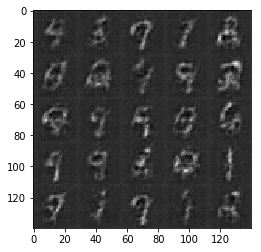

Epoch 2/2... Discriminator Loss: 0.4851... Generator Loss: 2.7832
Epoch 2/2... Discriminator Loss: 0.5463... Generator Loss: 1.8439
Epoch 2/2... Discriminator Loss: 0.4454... Generator Loss: 2.9853
Epoch 2/2... Discriminator Loss: 0.4978... Generator Loss: 2.9147
Epoch 2/2... Discriminator Loss: 0.4227... Generator Loss: 3.7664
Epoch 2/2... Discriminator Loss: 0.5301... Generator Loss: 3.2348
Epoch 2/2... Discriminator Loss: 0.5051... Generator Loss: 3.8052
Epoch 2/2... Discriminator Loss: 0.4526... Generator Loss: 2.9751
Epoch 2/2... Discriminator Loss: 0.5443... Generator Loss: 2.3179
Epoch 2/2... Discriminator Loss: 0.5494... Generator Loss: 3.9225


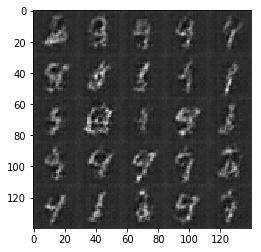

Epoch 2/2... Discriminator Loss: 0.4868... Generator Loss: 3.5863
Epoch 2/2... Discriminator Loss: 1.0351... Generator Loss: 4.1898
Epoch 2/2... Discriminator Loss: 0.6003... Generator Loss: 1.9729
Epoch 2/2... Discriminator Loss: 0.5101... Generator Loss: 2.0712
Epoch 2/2... Discriminator Loss: 0.5197... Generator Loss: 2.7066
Epoch 2/2... Discriminator Loss: 0.6033... Generator Loss: 2.4276
Epoch 2/2... Discriminator Loss: 0.4703... Generator Loss: 3.1182
Epoch 2/2... Discriminator Loss: 0.4776... Generator Loss: 2.8150
Epoch 2/2... Discriminator Loss: 0.4778... Generator Loss: 3.0430
Epoch 2/2... Discriminator Loss: 0.6023... Generator Loss: 1.9946


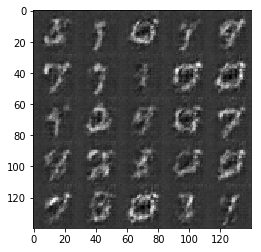

Epoch 2/2... Discriminator Loss: 0.4091... Generator Loss: 3.8667
Epoch 2/2... Discriminator Loss: 0.5437... Generator Loss: 2.1412
Epoch 2/2... Discriminator Loss: 0.4853... Generator Loss: 3.5682
Epoch 2/2... Discriminator Loss: 0.3934... Generator Loss: 3.6805
Epoch 2/2... Discriminator Loss: 0.4558... Generator Loss: 3.2373
Epoch 2/2... Discriminator Loss: 0.5409... Generator Loss: 3.3271
Epoch 2/2... Discriminator Loss: 0.4623... Generator Loss: 2.8501
Epoch 2/2... Discriminator Loss: 0.3719... Generator Loss: 3.6362
Epoch 2/2... Discriminator Loss: 0.5018... Generator Loss: 3.1147
Epoch 2/2... Discriminator Loss: 0.4781... Generator Loss: 3.2968


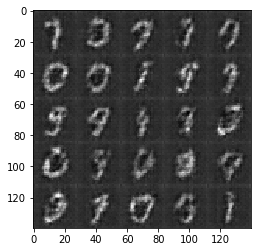

Epoch 2/2... Discriminator Loss: 0.5709... Generator Loss: 2.4014
Epoch 2/2... Discriminator Loss: 0.5051... Generator Loss: 2.6066
Epoch 2/2... Discriminator Loss: 0.5451... Generator Loss: 2.4801
Epoch 2/2... Discriminator Loss: 0.6260... Generator Loss: 2.0857
Epoch 2/2... Discriminator Loss: 0.5109... Generator Loss: 3.6173
Epoch 2/2... Discriminator Loss: 0.4512... Generator Loss: 3.2799
Epoch 2/2... Discriminator Loss: 0.5581... Generator Loss: 2.5084
Epoch 2/2... Discriminator Loss: 0.4747... Generator Loss: 2.9458
Epoch 2/2... Discriminator Loss: 0.4490... Generator Loss: 3.6836
Epoch 2/2... Discriminator Loss: 0.4988... Generator Loss: 3.6405


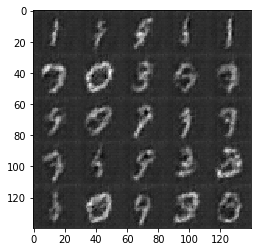

Epoch 2/2... Discriminator Loss: 0.4120... Generator Loss: 4.1803
Epoch 2/2... Discriminator Loss: 0.4485... Generator Loss: 3.1150
Epoch 2/2... Discriminator Loss: 0.5131... Generator Loss: 2.7021
Epoch 2/2... Discriminator Loss: 0.4334... Generator Loss: 3.3196
Epoch 2/2... Discriminator Loss: 0.5020... Generator Loss: 3.6761
Epoch 2/2... Discriminator Loss: 0.4715... Generator Loss: 2.9266
Epoch 2/2... Discriminator Loss: 0.4324... Generator Loss: 3.4026
Epoch 2/2... Discriminator Loss: 0.4913... Generator Loss: 2.6985
Epoch 2/2... Discriminator Loss: 0.6298... Generator Loss: 2.0700
Epoch 2/2... Discriminator Loss: 0.4648... Generator Loss: 3.2675


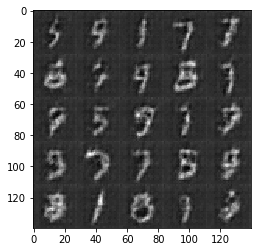

Epoch 2/2... Discriminator Loss: 0.4934... Generator Loss: 3.1018
Epoch 2/2... Discriminator Loss: 0.5199... Generator Loss: 2.5131
Epoch 2/2... Discriminator Loss: 0.4979... Generator Loss: 2.5290
Epoch 2/2... Discriminator Loss: 0.4337... Generator Loss: 2.9985
Epoch 2/2... Discriminator Loss: 0.5791... Generator Loss: 2.4012
Epoch 2/2... Discriminator Loss: 0.4460... Generator Loss: 2.8331
Epoch 2/2... Discriminator Loss: 0.5360... Generator Loss: 3.3259
Epoch 2/2... Discriminator Loss: 0.4842... Generator Loss: 3.9396
Epoch 2/2... Discriminator Loss: 0.5775... Generator Loss: 2.7551
Epoch 2/2... Discriminator Loss: 0.5322... Generator Loss: 2.2694


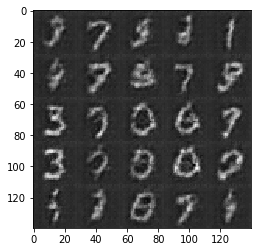

Epoch 2/2... Discriminator Loss: 0.4374... Generator Loss: 3.5038
Epoch 2/2... Discriminator Loss: 0.5359... Generator Loss: 2.6770
Epoch 2/2... Discriminator Loss: 0.4735... Generator Loss: 2.3451
Epoch 2/2... Discriminator Loss: 0.4658... Generator Loss: 3.2247
Epoch 2/2... Discriminator Loss: 0.4977... Generator Loss: 3.2193
Epoch 2/2... Discriminator Loss: 0.5210... Generator Loss: 2.6114
Epoch 2/2... Discriminator Loss: 0.5631... Generator Loss: 3.7088
Epoch 2/2... Discriminator Loss: 1.3595... Generator Loss: 1.9412
Epoch 2/2... Discriminator Loss: 0.5958... Generator Loss: 2.0902
Epoch 2/2... Discriminator Loss: 0.4712... Generator Loss: 2.5261


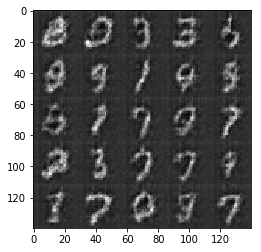

Epoch 2/2... Discriminator Loss: 0.5058... Generator Loss: 2.7684
Epoch 2/2... Discriminator Loss: 0.5010... Generator Loss: 3.3188
Epoch 2/2... Discriminator Loss: 0.5287... Generator Loss: 3.2099
Epoch 2/2... Discriminator Loss: 0.5573... Generator Loss: 2.5413
Epoch 2/2... Discriminator Loss: 0.5676... Generator Loss: 3.0162
Epoch 2/2... Discriminator Loss: 0.4580... Generator Loss: 2.8957
Epoch 2/2... Discriminator Loss: 0.5093... Generator Loss: 2.3252
Epoch 2/2... Discriminator Loss: 0.5374... Generator Loss: 2.9058
Epoch 2/2... Discriminator Loss: 0.5227... Generator Loss: 3.1930
Epoch 2/2... Discriminator Loss: 0.5590... Generator Loss: 2.2092


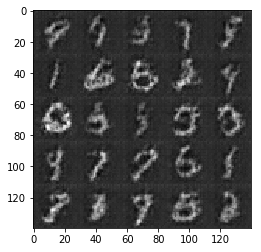

Epoch 2/2... Discriminator Loss: 0.4959... Generator Loss: 2.9604
Epoch 2/2... Discriminator Loss: 0.4530... Generator Loss: 3.3197
Epoch 2/2... Discriminator Loss: 0.4710... Generator Loss: 2.5215
Epoch 2/2... Discriminator Loss: 0.5314... Generator Loss: 2.4638
Epoch 2/2... Discriminator Loss: 0.4873... Generator Loss: 3.0028
Epoch 2/2... Discriminator Loss: 0.5358... Generator Loss: 3.2421
Epoch 2/2... Discriminator Loss: 0.4612... Generator Loss: 3.5448
Epoch 2/2... Discriminator Loss: 0.4443... Generator Loss: 3.7009
Epoch 2/2... Discriminator Loss: 0.4548... Generator Loss: 2.6834
Epoch 2/2... Discriminator Loss: 0.5934... Generator Loss: 1.9470


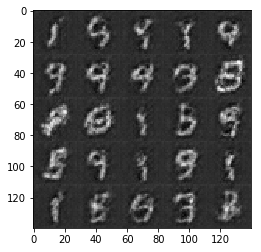

Epoch 2/2... Discriminator Loss: 0.5205... Generator Loss: 3.3254
Epoch 2/2... Discriminator Loss: 0.5210... Generator Loss: 3.1401
Epoch 2/2... Discriminator Loss: 0.5507... Generator Loss: 2.2512
Epoch 2/2... Discriminator Loss: 0.4900... Generator Loss: 2.7624
Epoch 2/2... Discriminator Loss: 0.5158... Generator Loss: 3.3630
Epoch 2/2... Discriminator Loss: 0.4804... Generator Loss: 3.0126
Epoch 2/2... Discriminator Loss: 0.4884... Generator Loss: 2.8597
Epoch 2/2... Discriminator Loss: 0.4960... Generator Loss: 3.4001
Epoch 2/2... Discriminator Loss: 0.4557... Generator Loss: 2.5739
Epoch 2/2... Discriminator Loss: 0.4464... Generator Loss: 4.4859


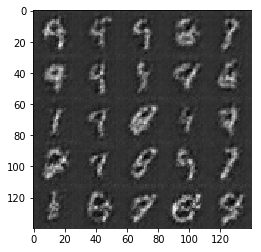

Epoch 2/2... Discriminator Loss: 0.5453... Generator Loss: 3.2118
Epoch 2/2... Discriminator Loss: 0.5459... Generator Loss: 2.2972
Epoch 2/2... Discriminator Loss: 0.4969... Generator Loss: 2.9554
Epoch 2/2... Discriminator Loss: 0.4826... Generator Loss: 2.3799
Epoch 2/2... Discriminator Loss: 0.5143... Generator Loss: 2.4800
Epoch 2/2... Discriminator Loss: 0.4729... Generator Loss: 3.1837
Epoch 2/2... Discriminator Loss: 0.4558... Generator Loss: 3.0474
Epoch 2/2... Discriminator Loss: 0.4558... Generator Loss: 2.9020
Epoch 2/2... Discriminator Loss: 0.4662... Generator Loss: 3.3695
Epoch 2/2... Discriminator Loss: 0.4567... Generator Loss: 3.0216


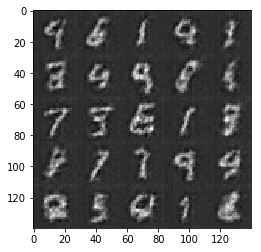

Epoch 2/2... Discriminator Loss: 0.4851... Generator Loss: 2.6363
Epoch 2/2... Discriminator Loss: 0.5087... Generator Loss: 3.8281
Epoch 2/2... Discriminator Loss: 0.4763... Generator Loss: 3.4670
Epoch 2/2... Discriminator Loss: 0.4578... Generator Loss: 2.8541
Epoch 2/2... Discriminator Loss: 0.4798... Generator Loss: 2.1905
Epoch 2/2... Discriminator Loss: 0.5246... Generator Loss: 2.6031
Epoch 2/2... Discriminator Loss: 0.4639... Generator Loss: 3.1600
Epoch 2/2... Discriminator Loss: 0.4852... Generator Loss: 3.0341
Epoch 2/2... Discriminator Loss: 0.5077... Generator Loss: 2.8598
Epoch 2/2... Discriminator Loss: 0.7319... Generator Loss: 1.7797


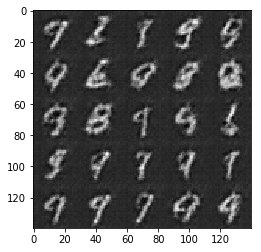

Epoch 2/2... Discriminator Loss: 0.7405... Generator Loss: 1.6057
Epoch 2/2... Discriminator Loss: 0.4176... Generator Loss: 3.5260
Epoch 2/2... Discriminator Loss: 0.5196... Generator Loss: 3.6526
Epoch 2/2... Discriminator Loss: 0.4566... Generator Loss: 2.9423
Epoch 2/2... Discriminator Loss: 0.5041... Generator Loss: 3.3516
Epoch 2/2... Discriminator Loss: 0.4939... Generator Loss: 2.8234
Epoch 2/2... Discriminator Loss: 1.2814... Generator Loss: 1.5510
Epoch 2/2... Discriminator Loss: 0.5571... Generator Loss: 2.3435
Epoch 2/2... Discriminator Loss: 0.6138... Generator Loss: 2.0873
Epoch 2/2... Discriminator Loss: 0.6227... Generator Loss: 2.1051


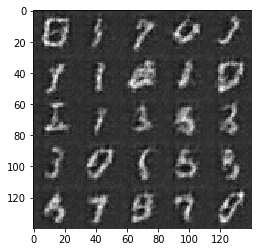

Epoch 2/2... Discriminator Loss: 0.4721... Generator Loss: 3.1906
Epoch 2/2... Discriminator Loss: 0.6729... Generator Loss: 1.7485
Epoch 2/2... Discriminator Loss: 0.5101... Generator Loss: 2.4771
Epoch 2/2... Discriminator Loss: 0.6059... Generator Loss: 2.4976
Epoch 2/2... Discriminator Loss: 0.4720... Generator Loss: 2.8987
Epoch 2/2... Discriminator Loss: 0.5112... Generator Loss: 2.3494
Epoch 2/2... Discriminator Loss: 0.5228... Generator Loss: 3.0406
Epoch 2/2... Discriminator Loss: 0.5562... Generator Loss: 2.1810
Epoch 2/2... Discriminator Loss: 0.5051... Generator Loss: 3.4378
Epoch 2/2... Discriminator Loss: 0.5631... Generator Loss: 2.4767


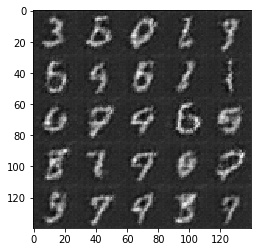

Epoch 2/2... Discriminator Loss: 0.4756... Generator Loss: 2.9350
Epoch 2/2... Discriminator Loss: 0.5724... Generator Loss: 1.9651
Epoch 2/2... Discriminator Loss: 0.5687... Generator Loss: 2.0457
Epoch 2/2... Discriminator Loss: 0.4914... Generator Loss: 3.2577
Epoch 2/2... Discriminator Loss: 0.3836... Generator Loss: 3.5337
Epoch 2/2... Discriminator Loss: 0.4921... Generator Loss: 2.7846
Epoch 2/2... Discriminator Loss: 0.4521... Generator Loss: 3.7362
Epoch 2/2... Discriminator Loss: 0.5080... Generator Loss: 2.1581
Epoch 2/2... Discriminator Loss: 0.4588... Generator Loss: 3.2789
Epoch 2/2... Discriminator Loss: 0.4799... Generator Loss: 2.9820


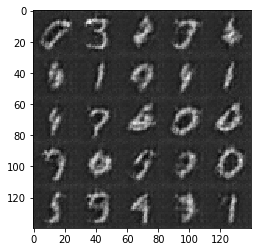

Epoch 2/2... Discriminator Loss: 0.4385... Generator Loss: 4.2923
Epoch 2/2... Discriminator Loss: 0.4703... Generator Loss: 3.2324
Epoch 2/2... Discriminator Loss: 0.5511... Generator Loss: 3.2489
Epoch 2/2... Discriminator Loss: 0.4514... Generator Loss: 3.4019
Epoch 2/2... Discriminator Loss: 0.5284... Generator Loss: 2.4461
Epoch 2/2... Discriminator Loss: 0.5318... Generator Loss: 2.9958
Epoch 2/2... Discriminator Loss: 0.4676... Generator Loss: 3.0198
Epoch 2/2... Discriminator Loss: 0.4856... Generator Loss: 2.5415
Epoch 2/2... Discriminator Loss: 0.5638... Generator Loss: 2.7434
Epoch 2/2... Discriminator Loss: 0.4790... Generator Loss: 3.1303


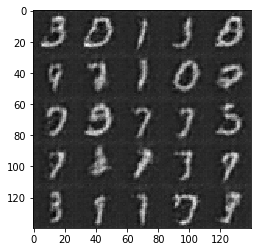

Epoch 2/2... Discriminator Loss: 0.5573... Generator Loss: 2.0633
Epoch 2/2... Discriminator Loss: 0.4237... Generator Loss: 3.4321
Epoch 2/2... Discriminator Loss: 0.4993... Generator Loss: 2.7190
Epoch 2/2... Discriminator Loss: 0.5899... Generator Loss: 2.0911
Epoch 2/2... Discriminator Loss: 0.5119... Generator Loss: 2.9190
Epoch 2/2... Discriminator Loss: 0.5049... Generator Loss: 2.8399
Epoch 2/2... Discriminator Loss: 0.7301... Generator Loss: 1.4030
Epoch 2/2... Discriminator Loss: 0.4893... Generator Loss: 3.1783
Epoch 2/2... Discriminator Loss: 0.5262... Generator Loss: 2.5608
Epoch 2/2... Discriminator Loss: 0.4969... Generator Loss: 3.3090


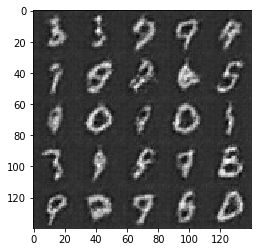

Epoch 2/2... Discriminator Loss: 0.5060... Generator Loss: 2.7671
Epoch 2/2... Discriminator Loss: 0.4946... Generator Loss: 2.9817
Epoch 2/2... Discriminator Loss: 0.4903... Generator Loss: 3.3305
Epoch 2/2... Discriminator Loss: 0.4273... Generator Loss: 3.4152
Epoch 2/2... Discriminator Loss: 0.4544... Generator Loss: 3.4493


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.0400... Generator Loss: 0.4006
Epoch 1/1... Discriminator Loss: 1.1788... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 0.9368... Generator Loss: 1.1465
Epoch 1/1... Discriminator Loss: 0.8666... Generator Loss: 1.4759
Epoch 1/1... Discriminator Loss: 0.5843... Generator Loss: 2.2115
Epoch 1/1... Discriminator Loss: 0.6522... Generator Loss: 1.8798
Epoch 1/1... Discriminator Loss: 0.5009... Generator Loss: 3.0389
Epoch 1/1... Discriminator Loss: 0.6056... Generator Loss: 2.2070
Epoch 1/1... Discriminator Loss: 0.5771... Generator Loss: 3.0375
Epoch 1/1... Discriminator Loss: 0.6277... Generator Loss: 2.9097


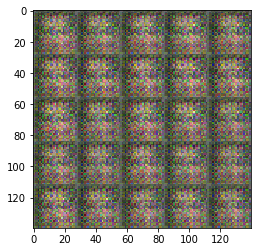

Epoch 1/1... Discriminator Loss: 0.5072... Generator Loss: 3.5547
Epoch 1/1... Discriminator Loss: 0.7409... Generator Loss: 1.5135
Epoch 1/1... Discriminator Loss: 0.6085... Generator Loss: 2.1539
Epoch 1/1... Discriminator Loss: 0.6560... Generator Loss: 2.6509
Epoch 1/1... Discriminator Loss: 0.6060... Generator Loss: 2.1844
Epoch 1/1... Discriminator Loss: 0.5050... Generator Loss: 2.8882
Epoch 1/1... Discriminator Loss: 0.5874... Generator Loss: 2.6087
Epoch 1/1... Discriminator Loss: 0.5667... Generator Loss: 3.1652
Epoch 1/1... Discriminator Loss: 0.5470... Generator Loss: 3.0166
Epoch 1/1... Discriminator Loss: 0.4954... Generator Loss: 2.9566


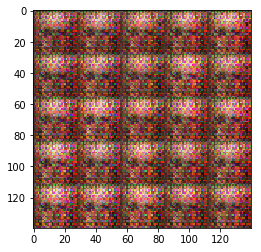

Epoch 1/1... Discriminator Loss: 0.4856... Generator Loss: 2.9448
Epoch 1/1... Discriminator Loss: 0.4960... Generator Loss: 3.4676
Epoch 1/1... Discriminator Loss: 0.5186... Generator Loss: 3.2678
Epoch 1/1... Discriminator Loss: 0.5339... Generator Loss: 3.4486
Epoch 1/1... Discriminator Loss: 0.5789... Generator Loss: 1.9511
Epoch 1/1... Discriminator Loss: 0.5718... Generator Loss: 3.2465
Epoch 1/1... Discriminator Loss: 0.5852... Generator Loss: 3.7434
Epoch 1/1... Discriminator Loss: 0.6904... Generator Loss: 1.6193
Epoch 1/1... Discriminator Loss: 0.5160... Generator Loss: 2.8476
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 5.2658


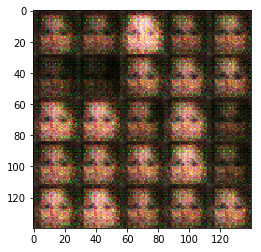

Epoch 1/1... Discriminator Loss: 0.8325... Generator Loss: 4.2230
Epoch 1/1... Discriminator Loss: 0.5541... Generator Loss: 3.1837
Epoch 1/1... Discriminator Loss: 0.5987... Generator Loss: 2.3631
Epoch 1/1... Discriminator Loss: 0.4802... Generator Loss: 3.0887
Epoch 1/1... Discriminator Loss: 0.5218... Generator Loss: 2.1069
Epoch 1/1... Discriminator Loss: 0.6212... Generator Loss: 1.8397
Epoch 1/1... Discriminator Loss: 0.6522... Generator Loss: 2.5767
Epoch 1/1... Discriminator Loss: 0.4433... Generator Loss: 2.7058
Epoch 1/1... Discriminator Loss: 0.5279... Generator Loss: 2.9182
Epoch 1/1... Discriminator Loss: 0.4945... Generator Loss: 2.6272


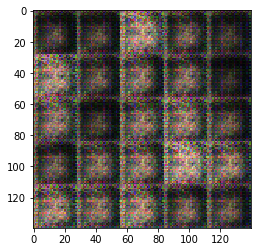

Epoch 1/1... Discriminator Loss: 0.5118... Generator Loss: 3.3589
Epoch 1/1... Discriminator Loss: 0.6127... Generator Loss: 2.4945
Epoch 1/1... Discriminator Loss: 0.5224... Generator Loss: 2.4706
Epoch 1/1... Discriminator Loss: 1.7063... Generator Loss: 6.5588
Epoch 1/1... Discriminator Loss: 0.6016... Generator Loss: 2.5286
Epoch 1/1... Discriminator Loss: 0.8970... Generator Loss: 2.2963
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 3.4707
Epoch 1/1... Discriminator Loss: 1.1969... Generator Loss: 2.8153
Epoch 1/1... Discriminator Loss: 1.1273... Generator Loss: 0.9586
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 1.1157


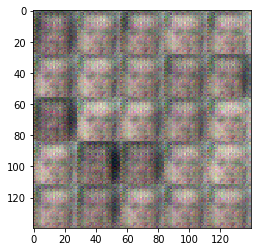

Epoch 1/1... Discriminator Loss: 0.8754... Generator Loss: 2.1379
Epoch 1/1... Discriminator Loss: 0.8364... Generator Loss: 1.6674
Epoch 1/1... Discriminator Loss: 0.6063... Generator Loss: 3.0112
Epoch 1/1... Discriminator Loss: 0.4798... Generator Loss: 3.1107
Epoch 1/1... Discriminator Loss: 0.9166... Generator Loss: 2.0997
Epoch 1/1... Discriminator Loss: 0.9959... Generator Loss: 1.6110
Epoch 1/1... Discriminator Loss: 0.7598... Generator Loss: 1.5819
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.8617
Epoch 1/1... Discriminator Loss: 0.5764... Generator Loss: 2.5333
Epoch 1/1... Discriminator Loss: 0.6422... Generator Loss: 2.4365


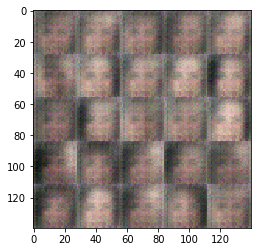

Epoch 1/1... Discriminator Loss: 0.7332... Generator Loss: 1.8925
Epoch 1/1... Discriminator Loss: 0.7106... Generator Loss: 2.1782
Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 2.5146
Epoch 1/1... Discriminator Loss: 0.7813... Generator Loss: 1.9029
Epoch 1/1... Discriminator Loss: 0.8830... Generator Loss: 2.2048
Epoch 1/1... Discriminator Loss: 0.8503... Generator Loss: 1.9982
Epoch 1/1... Discriminator Loss: 0.8781... Generator Loss: 1.1621
Epoch 1/1... Discriminator Loss: 0.8274... Generator Loss: 1.3730
Epoch 1/1... Discriminator Loss: 1.1388... Generator Loss: 0.9800
Epoch 1/1... Discriminator Loss: 0.5807... Generator Loss: 2.3444


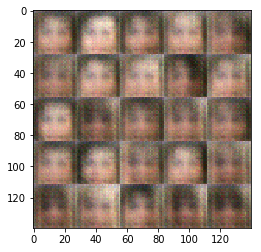

Epoch 1/1... Discriminator Loss: 0.7377... Generator Loss: 1.7247
Epoch 1/1... Discriminator Loss: 0.7965... Generator Loss: 1.2836
Epoch 1/1... Discriminator Loss: 0.6157... Generator Loss: 2.7923
Epoch 1/1... Discriminator Loss: 0.6875... Generator Loss: 1.7834
Epoch 1/1... Discriminator Loss: 0.6696... Generator Loss: 2.6509
Epoch 1/1... Discriminator Loss: 0.4934... Generator Loss: 2.6349
Epoch 1/1... Discriminator Loss: 0.8187... Generator Loss: 1.2524
Epoch 1/1... Discriminator Loss: 0.6559... Generator Loss: 1.8725
Epoch 1/1... Discriminator Loss: 1.0853... Generator Loss: 3.7449
Epoch 1/1... Discriminator Loss: 0.5767... Generator Loss: 2.2292


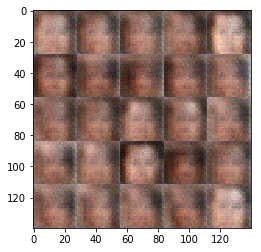

Epoch 1/1... Discriminator Loss: 0.6159... Generator Loss: 2.4019
Epoch 1/1... Discriminator Loss: 0.6131... Generator Loss: 2.2941
Epoch 1/1... Discriminator Loss: 0.8261... Generator Loss: 1.1928
Epoch 1/1... Discriminator Loss: 0.7037... Generator Loss: 2.6442
Epoch 1/1... Discriminator Loss: 0.5273... Generator Loss: 3.4023
Epoch 1/1... Discriminator Loss: 0.6740... Generator Loss: 1.5167
Epoch 1/1... Discriminator Loss: 0.6876... Generator Loss: 1.6054
Epoch 1/1... Discriminator Loss: 0.9927... Generator Loss: 2.0663
Epoch 1/1... Discriminator Loss: 0.5817... Generator Loss: 2.6400
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.8038


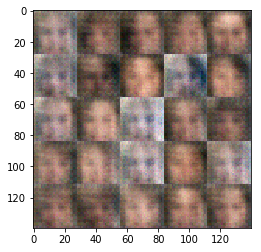

Epoch 1/1... Discriminator Loss: 0.9064... Generator Loss: 1.0879
Epoch 1/1... Discriminator Loss: 0.7172... Generator Loss: 1.5085
Epoch 1/1... Discriminator Loss: 1.4823... Generator Loss: 0.4868
Epoch 1/1... Discriminator Loss: 0.6578... Generator Loss: 2.2667
Epoch 1/1... Discriminator Loss: 0.7319... Generator Loss: 3.2036
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 0.5979
Epoch 1/1... Discriminator Loss: 0.9304... Generator Loss: 1.0036
Epoch 1/1... Discriminator Loss: 0.7571... Generator Loss: 2.4501
Epoch 1/1... Discriminator Loss: 1.8546... Generator Loss: 0.3676
Epoch 1/1... Discriminator Loss: 0.6312... Generator Loss: 3.3942


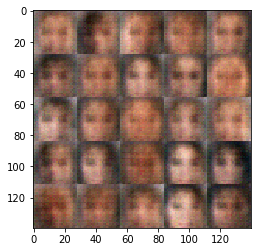

Epoch 1/1... Discriminator Loss: 0.6005... Generator Loss: 4.5248
Epoch 1/1... Discriminator Loss: 0.6751... Generator Loss: 2.5316
Epoch 1/1... Discriminator Loss: 0.8261... Generator Loss: 1.3053
Epoch 1/1... Discriminator Loss: 0.5587... Generator Loss: 3.4030
Epoch 1/1... Discriminator Loss: 0.8282... Generator Loss: 1.1446
Epoch 1/1... Discriminator Loss: 0.6526... Generator Loss: 1.8440
Epoch 1/1... Discriminator Loss: 0.5473... Generator Loss: 2.7680
Epoch 1/1... Discriminator Loss: 0.5039... Generator Loss: 4.2429
Epoch 1/1... Discriminator Loss: 0.5965... Generator Loss: 2.1560
Epoch 1/1... Discriminator Loss: 0.7333... Generator Loss: 1.4281


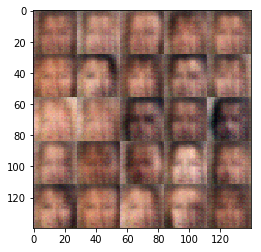

Epoch 1/1... Discriminator Loss: 0.6574... Generator Loss: 1.8292
Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 0.5721
Epoch 1/1... Discriminator Loss: 0.9571... Generator Loss: 0.9759
Epoch 1/1... Discriminator Loss: 1.5162... Generator Loss: 0.4269
Epoch 1/1... Discriminator Loss: 0.5637... Generator Loss: 3.3382
Epoch 1/1... Discriminator Loss: 0.6210... Generator Loss: 3.8316
Epoch 1/1... Discriminator Loss: 0.8102... Generator Loss: 2.3439
Epoch 1/1... Discriminator Loss: 0.8876... Generator Loss: 1.0830
Epoch 1/1... Discriminator Loss: 0.7149... Generator Loss: 1.3852
Epoch 1/1... Discriminator Loss: 0.5039... Generator Loss: 3.0774


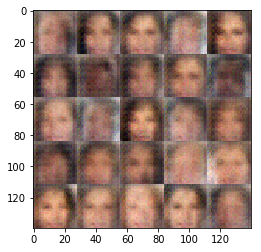

Epoch 1/1... Discriminator Loss: 0.9053... Generator Loss: 1.0885
Epoch 1/1... Discriminator Loss: 0.6107... Generator Loss: 2.6353
Epoch 1/1... Discriminator Loss: 0.5675... Generator Loss: 3.3632
Epoch 1/1... Discriminator Loss: 0.7232... Generator Loss: 1.6295
Epoch 1/1... Discriminator Loss: 0.5047... Generator Loss: 3.6856
Epoch 1/1... Discriminator Loss: 0.7171... Generator Loss: 3.0788
Epoch 1/1... Discriminator Loss: 1.2022... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.5003... Generator Loss: 4.8449
Epoch 1/1... Discriminator Loss: 0.5024... Generator Loss: 4.2266
Epoch 1/1... Discriminator Loss: 1.6474... Generator Loss: 0.3917


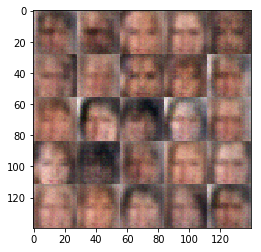

Epoch 1/1... Discriminator Loss: 0.5322... Generator Loss: 3.3282
Epoch 1/1... Discriminator Loss: 0.4895... Generator Loss: 3.5455
Epoch 1/1... Discriminator Loss: 0.6967... Generator Loss: 3.5084
Epoch 1/1... Discriminator Loss: 0.6717... Generator Loss: 1.7487
Epoch 1/1... Discriminator Loss: 0.4392... Generator Loss: 3.6394
Epoch 1/1... Discriminator Loss: 0.5169... Generator Loss: 2.7538
Epoch 1/1... Discriminator Loss: 0.5578... Generator Loss: 2.1722
Epoch 1/1... Discriminator Loss: 0.4907... Generator Loss: 3.2059
Epoch 1/1... Discriminator Loss: 0.9875... Generator Loss: 0.9363
Epoch 1/1... Discriminator Loss: 0.6004... Generator Loss: 2.8512


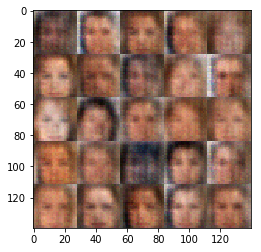

Epoch 1/1... Discriminator Loss: 0.5145... Generator Loss: 2.4385
Epoch 1/1... Discriminator Loss: 0.4536... Generator Loss: 5.2065
Epoch 1/1... Discriminator Loss: 0.5218... Generator Loss: 4.9201
Epoch 1/1... Discriminator Loss: 0.6712... Generator Loss: 1.8937
Epoch 1/1... Discriminator Loss: 0.8756... Generator Loss: 3.2939
Epoch 1/1... Discriminator Loss: 0.4969... Generator Loss: 4.0307
Epoch 1/1... Discriminator Loss: 0.6498... Generator Loss: 3.5664
Epoch 1/1... Discriminator Loss: 0.7087... Generator Loss: 6.2148
Epoch 1/1... Discriminator Loss: 0.7689... Generator Loss: 4.0519
Epoch 1/1... Discriminator Loss: 0.6119... Generator Loss: 2.1528


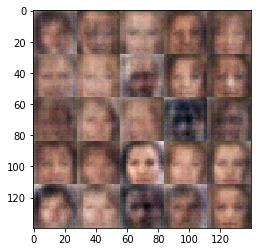

Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 5.1924
Epoch 1/1... Discriminator Loss: 0.5622... Generator Loss: 3.1011
Epoch 1/1... Discriminator Loss: 0.4724... Generator Loss: 3.3934
Epoch 1/1... Discriminator Loss: 0.6011... Generator Loss: 1.8412
Epoch 1/1... Discriminator Loss: 0.6196... Generator Loss: 4.4870
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.6318
Epoch 1/1... Discriminator Loss: 0.6820... Generator Loss: 1.7447
Epoch 1/1... Discriminator Loss: 0.5566... Generator Loss: 4.1479
Epoch 1/1... Discriminator Loss: 0.6324... Generator Loss: 2.0496
Epoch 1/1... Discriminator Loss: 0.5375... Generator Loss: 3.0198


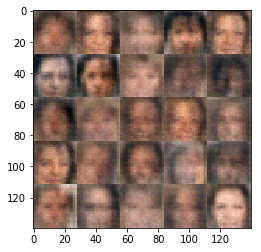

Epoch 1/1... Discriminator Loss: 0.5215... Generator Loss: 4.6941
Epoch 1/1... Discriminator Loss: 0.4860... Generator Loss: 3.5750
Epoch 1/1... Discriminator Loss: 0.8210... Generator Loss: 1.2468
Epoch 1/1... Discriminator Loss: 1.0945... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 0.5452... Generator Loss: 3.4003
Epoch 1/1... Discriminator Loss: 0.6881... Generator Loss: 4.4523
Epoch 1/1... Discriminator Loss: 0.5524... Generator Loss: 2.2348
Epoch 1/1... Discriminator Loss: 0.6344... Generator Loss: 3.2934
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 9.9036
Epoch 1/1... Discriminator Loss: 0.5048... Generator Loss: 2.6116


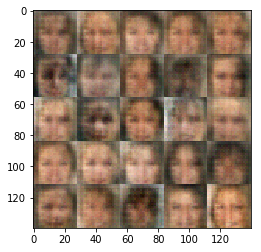

Epoch 1/1... Discriminator Loss: 0.4831... Generator Loss: 2.8622
Epoch 1/1... Discriminator Loss: 0.5327... Generator Loss: 2.5501
Epoch 1/1... Discriminator Loss: 0.9064... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 0.4743... Generator Loss: 3.9551
Epoch 1/1... Discriminator Loss: 0.5380... Generator Loss: 3.4447
Epoch 1/1... Discriminator Loss: 0.4656... Generator Loss: 3.5161
Epoch 1/1... Discriminator Loss: 0.9927... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 0.6064... Generator Loss: 2.1059
Epoch 1/1... Discriminator Loss: 0.4792... Generator Loss: 3.6727
Epoch 1/1... Discriminator Loss: 0.7173... Generator Loss: 1.7531


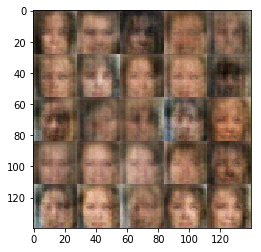

Epoch 1/1... Discriminator Loss: 0.8986... Generator Loss: 1.1390
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 3.9491
Epoch 1/1... Discriminator Loss: 0.4789... Generator Loss: 4.1739
Epoch 1/1... Discriminator Loss: 0.7627... Generator Loss: 1.4557
Epoch 1/1... Discriminator Loss: 0.7086... Generator Loss: 2.3519
Epoch 1/1... Discriminator Loss: 0.5677... Generator Loss: 2.3864
Epoch 1/1... Discriminator Loss: 0.6238... Generator Loss: 4.5426
Epoch 1/1... Discriminator Loss: 0.6927... Generator Loss: 1.4459
Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 2.0130
Epoch 1/1... Discriminator Loss: 0.4645... Generator Loss: 3.5321


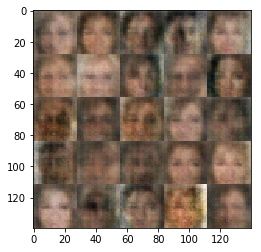

Epoch 1/1... Discriminator Loss: 0.5131... Generator Loss: 3.1975
Epoch 1/1... Discriminator Loss: 0.5738... Generator Loss: 3.6812
Epoch 1/1... Discriminator Loss: 0.6389... Generator Loss: 2.0017
Epoch 1/1... Discriminator Loss: 0.5550... Generator Loss: 4.2769
Epoch 1/1... Discriminator Loss: 0.5812... Generator Loss: 1.9679
Epoch 1/1... Discriminator Loss: 0.5188... Generator Loss: 3.7157
Epoch 1/1... Discriminator Loss: 0.4866... Generator Loss: 3.6023
Epoch 1/1... Discriminator Loss: 0.5324... Generator Loss: 3.2136
Epoch 1/1... Discriminator Loss: 0.5993... Generator Loss: 1.9900
Epoch 1/1... Discriminator Loss: 0.5837... Generator Loss: 2.2904


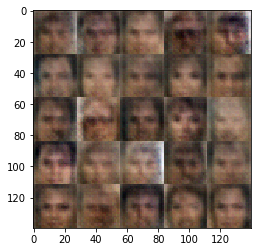

Epoch 1/1... Discriminator Loss: 0.5831... Generator Loss: 3.2272
Epoch 1/1... Discriminator Loss: 0.5694... Generator Loss: 3.9080
Epoch 1/1... Discriminator Loss: 0.4791... Generator Loss: 4.3660
Epoch 1/1... Discriminator Loss: 0.4653... Generator Loss: 2.9354
Epoch 1/1... Discriminator Loss: 0.7135... Generator Loss: 1.3654
Epoch 1/1... Discriminator Loss: 0.5351... Generator Loss: 4.2620
Epoch 1/1... Discriminator Loss: 0.5777... Generator Loss: 4.9442
Epoch 1/1... Discriminator Loss: 0.6154... Generator Loss: 2.0009
Epoch 1/1... Discriminator Loss: 0.4800... Generator Loss: 4.3873
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 4.4577


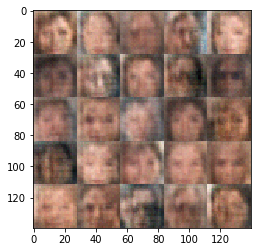

Epoch 1/1... Discriminator Loss: 0.6511... Generator Loss: 4.3058
Epoch 1/1... Discriminator Loss: 0.9307... Generator Loss: 7.1706
Epoch 1/1... Discriminator Loss: 0.6097... Generator Loss: 2.5567
Epoch 1/1... Discriminator Loss: 0.5906... Generator Loss: 3.6425
Epoch 1/1... Discriminator Loss: 0.4612... Generator Loss: 2.7901
Epoch 1/1... Discriminator Loss: 0.4505... Generator Loss: 2.8168
Epoch 1/1... Discriminator Loss: 0.5246... Generator Loss: 3.1221
Epoch 1/1... Discriminator Loss: 0.5709... Generator Loss: 2.8477
Epoch 1/1... Discriminator Loss: 0.4820... Generator Loss: 6.2005
Epoch 1/1... Discriminator Loss: 0.5130... Generator Loss: 4.0012


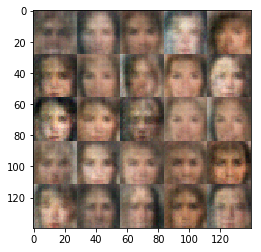

Epoch 1/1... Discriminator Loss: 0.4633... Generator Loss: 3.3932
Epoch 1/1... Discriminator Loss: 0.5977... Generator Loss: 3.5408
Epoch 1/1... Discriminator Loss: 0.4288... Generator Loss: 4.8873
Epoch 1/1... Discriminator Loss: 0.7015... Generator Loss: 1.6795
Epoch 1/1... Discriminator Loss: 0.5766... Generator Loss: 6.2618
Epoch 1/1... Discriminator Loss: 0.7811... Generator Loss: 1.4067
Epoch 1/1... Discriminator Loss: 0.5932... Generator Loss: 2.1033
Epoch 1/1... Discriminator Loss: 0.4773... Generator Loss: 2.9781
Epoch 1/1... Discriminator Loss: 0.5636... Generator Loss: 3.7614
Epoch 1/1... Discriminator Loss: 0.5294... Generator Loss: 4.9121


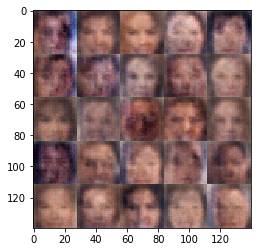

Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 2.0315
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 1.3827
Epoch 1/1... Discriminator Loss: 0.6044... Generator Loss: 9.6619
Epoch 1/1... Discriminator Loss: 0.5638... Generator Loss: 3.4944
Epoch 1/1... Discriminator Loss: 0.4373... Generator Loss: 6.0325
Epoch 1/1... Discriminator Loss: 0.4327... Generator Loss: 5.3770
Epoch 1/1... Discriminator Loss: 0.6304... Generator Loss: 1.4384
Epoch 1/1... Discriminator Loss: 0.4906... Generator Loss: 4.4237
Epoch 1/1... Discriminator Loss: 0.4645... Generator Loss: 3.6261
Epoch 1/1... Discriminator Loss: 0.5957... Generator Loss: 2.2374


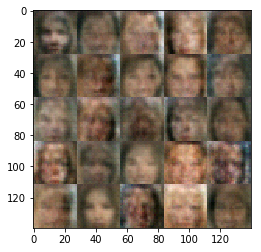

Epoch 1/1... Discriminator Loss: 0.6520... Generator Loss: 1.7166
Epoch 1/1... Discriminator Loss: 0.7856... Generator Loss: 6.1573
Epoch 1/1... Discriminator Loss: 1.0225... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 0.4714... Generator Loss: 5.3542
Epoch 1/1... Discriminator Loss: 0.5124... Generator Loss: 4.0372
Epoch 1/1... Discriminator Loss: 1.0222... Generator Loss: 7.4409
Epoch 1/1... Discriminator Loss: 0.5176... Generator Loss: 3.2620
Epoch 1/1... Discriminator Loss: 0.4858... Generator Loss: 4.3322
Epoch 1/1... Discriminator Loss: 0.5508... Generator Loss: 3.3549
Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 1.1492


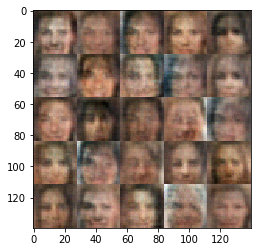

Epoch 1/1... Discriminator Loss: 1.0570... Generator Loss: 3.7259
Epoch 1/1... Discriminator Loss: 0.4203... Generator Loss: 5.4495
Epoch 1/1... Discriminator Loss: 0.4743... Generator Loss: 7.8319
Epoch 1/1... Discriminator Loss: 0.5210... Generator Loss: 2.4676
Epoch 1/1... Discriminator Loss: 0.4812... Generator Loss: 4.4628
Epoch 1/1... Discriminator Loss: 0.5059... Generator Loss: 3.9056
Epoch 1/1... Discriminator Loss: 0.5883... Generator Loss: 1.7579
Epoch 1/1... Discriminator Loss: 0.4768... Generator Loss: 5.3345
Epoch 1/1... Discriminator Loss: 0.3829... Generator Loss: 4.4420
Epoch 1/1... Discriminator Loss: 0.4810... Generator Loss: 3.4512


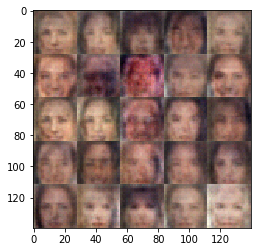

Epoch 1/1... Discriminator Loss: 0.6538... Generator Loss: 2.0885
Epoch 1/1... Discriminator Loss: 0.8313... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 0.4425... Generator Loss: 5.5742
Epoch 1/1... Discriminator Loss: 0.4910... Generator Loss: 2.8840
Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 9.4914
Epoch 1/1... Discriminator Loss: 0.5187... Generator Loss: 2.2484
Epoch 1/1... Discriminator Loss: 0.4634... Generator Loss: 3.1433
Epoch 1/1... Discriminator Loss: 0.4453... Generator Loss: 4.4196
Epoch 1/1... Discriminator Loss: 0.5091... Generator Loss: 3.9683
Epoch 1/1... Discriminator Loss: 0.5050... Generator Loss: 3.9976


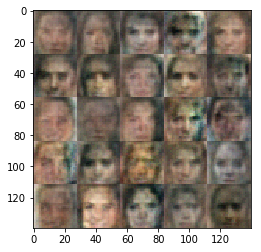

Epoch 1/1... Discriminator Loss: 0.4475... Generator Loss: 8.3630
Epoch 1/1... Discriminator Loss: 0.4875... Generator Loss: 5.7474
Epoch 1/1... Discriminator Loss: 0.4676... Generator Loss: 4.2153
Epoch 1/1... Discriminator Loss: 0.8554... Generator Loss: 1.0789
Epoch 1/1... Discriminator Loss: 0.4139... Generator Loss: 4.6490
Epoch 1/1... Discriminator Loss: 0.4314... Generator Loss: 3.1987
Epoch 1/1... Discriminator Loss: 0.4664... Generator Loss: 9.6473
Epoch 1/1... Discriminator Loss: 0.4271... Generator Loss: 6.3015
Epoch 1/1... Discriminator Loss: 0.5690... Generator Loss: 7.5748
Epoch 1/1... Discriminator Loss: 0.7734... Generator Loss: 1.4339


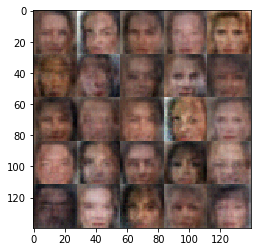

Epoch 1/1... Discriminator Loss: 0.5959... Generator Loss: 2.2718
Epoch 1/1... Discriminator Loss: 0.4264... Generator Loss: 3.9117
Epoch 1/1... Discriminator Loss: 0.4774... Generator Loss: 3.2443
Epoch 1/1... Discriminator Loss: 0.4548... Generator Loss: 4.1350
Epoch 1/1... Discriminator Loss: 0.4748... Generator Loss: 4.5006
Epoch 1/1... Discriminator Loss: 0.5515... Generator Loss: 2.5155
Epoch 1/1... Discriminator Loss: 0.9437... Generator Loss: 1.2095
Epoch 1/1... Discriminator Loss: 0.5321... Generator Loss: 5.1244
Epoch 1/1... Discriminator Loss: 0.7026... Generator Loss: 1.4669
Epoch 1/1... Discriminator Loss: 0.4492... Generator Loss: 5.6230


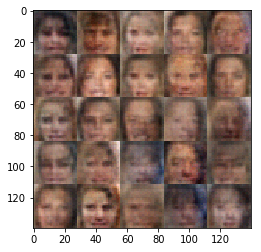

Epoch 1/1... Discriminator Loss: 1.1412... Generator Loss: 0.7219
Epoch 1/1... Discriminator Loss: 0.5234... Generator Loss: 2.2021
Epoch 1/1... Discriminator Loss: 0.4843... Generator Loss: 5.3205
Epoch 1/1... Discriminator Loss: 0.4589... Generator Loss: 6.7888
Epoch 1/1... Discriminator Loss: 0.7942... Generator Loss: 8.6884
Epoch 1/1... Discriminator Loss: 0.5264... Generator Loss: 5.2745
Epoch 1/1... Discriminator Loss: 0.5063... Generator Loss: 5.7364
Epoch 1/1... Discriminator Loss: 0.4134... Generator Loss: 5.6510
Epoch 1/1... Discriminator Loss: 0.9978... Generator Loss: 10.9919
Epoch 1/1... Discriminator Loss: 0.4250... Generator Loss: 6.1716


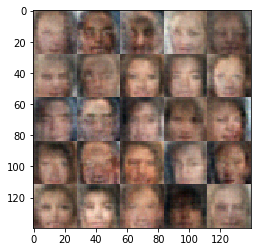

Epoch 1/1... Discriminator Loss: 0.6060... Generator Loss: 8.6783
Epoch 1/1... Discriminator Loss: 0.5113... Generator Loss: 3.6473
Epoch 1/1... Discriminator Loss: 0.4745... Generator Loss: 6.4879
Epoch 1/1... Discriminator Loss: 0.4334... Generator Loss: 3.7020
Epoch 1/1... Discriminator Loss: 0.4527... Generator Loss: 3.3317
Epoch 1/1... Discriminator Loss: 0.4563... Generator Loss: 5.2348
Epoch 1/1... Discriminator Loss: 0.4864... Generator Loss: 2.9967
Epoch 1/1... Discriminator Loss: 0.4555... Generator Loss: 10.9970
Epoch 1/1... Discriminator Loss: 0.6133... Generator Loss: 8.5410
Epoch 1/1... Discriminator Loss: 0.4366... Generator Loss: 5.6442


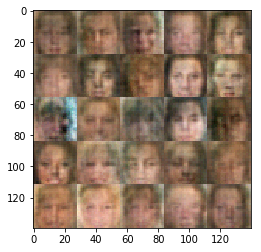

Epoch 1/1... Discriminator Loss: 1.7037... Generator Loss: 8.0904
Epoch 1/1... Discriminator Loss: 0.4501... Generator Loss: 6.0877
Epoch 1/1... Discriminator Loss: 0.7387... Generator Loss: 2.0060
Epoch 1/1... Discriminator Loss: 0.6181... Generator Loss: 8.5880
Epoch 1/1... Discriminator Loss: 0.5055... Generator Loss: 2.5829
Epoch 1/1... Discriminator Loss: 0.7307... Generator Loss: 1.4539
Epoch 1/1... Discriminator Loss: 0.4283... Generator Loss: 5.9411
Epoch 1/1... Discriminator Loss: 0.4992... Generator Loss: 9.7503
Epoch 1/1... Discriminator Loss: 0.4968... Generator Loss: 7.3618
Epoch 1/1... Discriminator Loss: 0.7361... Generator Loss: 1.6501


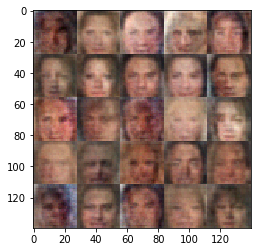

Epoch 1/1... Discriminator Loss: 0.5254... Generator Loss: 9.8528
Epoch 1/1... Discriminator Loss: 0.4459... Generator Loss: 9.7027
Epoch 1/1... Discriminator Loss: 0.6789... Generator Loss: 5.7759
Epoch 1/1... Discriminator Loss: 0.5134... Generator Loss: 2.8045
Epoch 1/1... Discriminator Loss: 0.3819... Generator Loss: 4.4363
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.8219
Epoch 1/1... Discriminator Loss: 0.5303... Generator Loss: 10.2590
Epoch 1/1... Discriminator Loss: 0.4277... Generator Loss: 4.0181
Epoch 1/1... Discriminator Loss: 0.6177... Generator Loss: 5.5897
Epoch 1/1... Discriminator Loss: 0.4138... Generator Loss: 7.3594


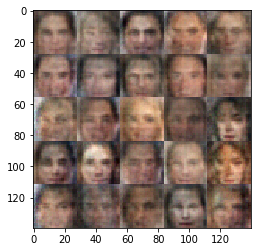

Epoch 1/1... Discriminator Loss: 0.4016... Generator Loss: 5.3863
Epoch 1/1... Discriminator Loss: 0.4105... Generator Loss: 3.5063
Epoch 1/1... Discriminator Loss: 0.5015... Generator Loss: 4.8937
Epoch 1/1... Discriminator Loss: 0.5154... Generator Loss: 2.6338
Epoch 1/1... Discriminator Loss: 0.4624... Generator Loss: 4.5360
Epoch 1/1... Discriminator Loss: 0.4887... Generator Loss: 3.7676
Epoch 1/1... Discriminator Loss: 0.5055... Generator Loss: 2.4495
Epoch 1/1... Discriminator Loss: 0.5826... Generator Loss: 7.1816
Epoch 1/1... Discriminator Loss: 0.4521... Generator Loss: 5.9147
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 2.6748


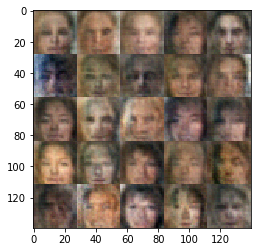

Epoch 1/1... Discriminator Loss: 0.4848... Generator Loss: 3.1655
Epoch 1/1... Discriminator Loss: 0.8017... Generator Loss: 1.4727
Epoch 1/1... Discriminator Loss: 1.0847... Generator Loss: 0.7155
Epoch 1/1... Discriminator Loss: 0.4084... Generator Loss: 4.7314
Epoch 1/1... Discriminator Loss: 0.4539... Generator Loss: 4.9694
Epoch 1/1... Discriminator Loss: 0.5024... Generator Loss: 2.3805
Epoch 1/1... Discriminator Loss: 0.4760... Generator Loss: 3.1289
Epoch 1/1... Discriminator Loss: 0.8050... Generator Loss: 1.4801
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 3.3557
Epoch 1/1... Discriminator Loss: 0.4470... Generator Loss: 4.9146


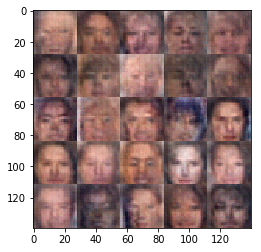

Epoch 1/1... Discriminator Loss: 0.4368... Generator Loss: 6.1360
Epoch 1/1... Discriminator Loss: 0.4941... Generator Loss: 5.2991
Epoch 1/1... Discriminator Loss: 0.3957... Generator Loss: 11.7389
Epoch 1/1... Discriminator Loss: 0.4640... Generator Loss: 4.7300
Epoch 1/1... Discriminator Loss: 0.4922... Generator Loss: 2.6745
Epoch 1/1... Discriminator Loss: 0.5196... Generator Loss: 4.6911
Epoch 1/1... Discriminator Loss: 0.4275... Generator Loss: 7.4091
Epoch 1/1... Discriminator Loss: 0.4929... Generator Loss: 2.8561
Epoch 1/1... Discriminator Loss: 0.5449... Generator Loss: 6.1607
Epoch 1/1... Discriminator Loss: 3.3977... Generator Loss: 6.6145


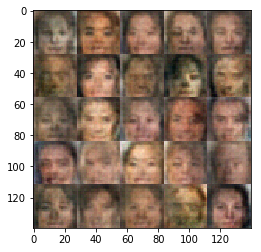

Epoch 1/1... Discriminator Loss: 0.6215... Generator Loss: 3.7344
Epoch 1/1... Discriminator Loss: 0.8949... Generator Loss: 1.1478
Epoch 1/1... Discriminator Loss: 0.5201... Generator Loss: 3.1469
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 8.7286
Epoch 1/1... Discriminator Loss: 0.5424... Generator Loss: 3.1049
Epoch 1/1... Discriminator Loss: 0.4203... Generator Loss: 4.5169
Epoch 1/1... Discriminator Loss: 0.5144... Generator Loss: 2.1549
Epoch 1/1... Discriminator Loss: 0.5980... Generator Loss: 1.9918
Epoch 1/1... Discriminator Loss: 0.4455... Generator Loss: 5.2869
Epoch 1/1... Discriminator Loss: 0.4825... Generator Loss: 3.0312


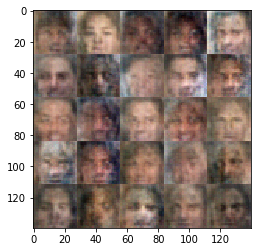

Epoch 1/1... Discriminator Loss: 0.4682... Generator Loss: 6.4231
Epoch 1/1... Discriminator Loss: 0.5451... Generator Loss: 2.1658
Epoch 1/1... Discriminator Loss: 0.4237... Generator Loss: 8.7793
Epoch 1/1... Discriminator Loss: 0.4877... Generator Loss: 3.0530
Epoch 1/1... Discriminator Loss: 0.5129... Generator Loss: 4.5111
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 9.2759
Epoch 1/1... Discriminator Loss: 0.4588... Generator Loss: 6.1904
Epoch 1/1... Discriminator Loss: 0.3825... Generator Loss: 4.7461
Epoch 1/1... Discriminator Loss: 0.4385... Generator Loss: 4.6763
Epoch 1/1... Discriminator Loss: 1.2066... Generator Loss: 8.2942


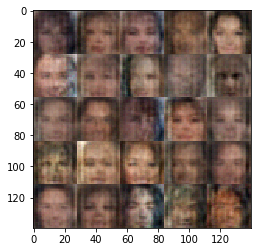

Epoch 1/1... Discriminator Loss: 0.5411... Generator Loss: 3.2155
Epoch 1/1... Discriminator Loss: 0.5115... Generator Loss: 5.2552
Epoch 1/1... Discriminator Loss: 0.3796... Generator Loss: 6.9916
Epoch 1/1... Discriminator Loss: 0.6898... Generator Loss: 1.6260
Epoch 1/1... Discriminator Loss: 0.8948... Generator Loss: 4.8786
Epoch 1/1... Discriminator Loss: 0.5767... Generator Loss: 4.3718
Epoch 1/1... Discriminator Loss: 0.5238... Generator Loss: 4.6877
Epoch 1/1... Discriminator Loss: 0.5101... Generator Loss: 5.0363
Epoch 1/1... Discriminator Loss: 0.5393... Generator Loss: 2.9712
Epoch 1/1... Discriminator Loss: 0.5479... Generator Loss: 2.3953


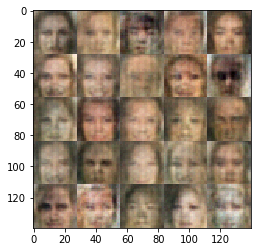

Epoch 1/1... Discriminator Loss: 0.7268... Generator Loss: 1.2454
Epoch 1/1... Discriminator Loss: 0.6155... Generator Loss: 1.8229
Epoch 1/1... Discriminator Loss: 0.5120... Generator Loss: 2.6437
Epoch 1/1... Discriminator Loss: 0.5092... Generator Loss: 4.0414
Epoch 1/1... Discriminator Loss: 0.4278... Generator Loss: 8.9386
Epoch 1/1... Discriminator Loss: 0.5929... Generator Loss: 2.4814
Epoch 1/1... Discriminator Loss: 0.6571... Generator Loss: 10.9142
Epoch 1/1... Discriminator Loss: 0.5254... Generator Loss: 7.7931
Epoch 1/1... Discriminator Loss: 0.5174... Generator Loss: 6.8074
Epoch 1/1... Discriminator Loss: 0.4987... Generator Loss: 5.3270


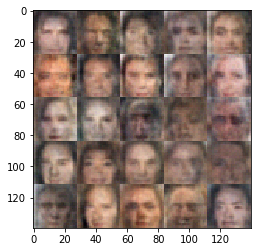

Epoch 1/1... Discriminator Loss: 0.5085... Generator Loss: 6.8831
Epoch 1/1... Discriminator Loss: 0.6436... Generator Loss: 1.7414
Epoch 1/1... Discriminator Loss: 0.5475... Generator Loss: 6.9379
Epoch 1/1... Discriminator Loss: 0.4213... Generator Loss: 6.8314
Epoch 1/1... Discriminator Loss: 0.5644... Generator Loss: 2.2561
Epoch 1/1... Discriminator Loss: 0.4075... Generator Loss: 4.8398
Epoch 1/1... Discriminator Loss: 0.5138... Generator Loss: 6.4619
Epoch 1/1... Discriminator Loss: 0.6005... Generator Loss: 1.8269
Epoch 1/1... Discriminator Loss: 0.4772... Generator Loss: 3.7451
Epoch 1/1... Discriminator Loss: 0.4902... Generator Loss: 3.0329


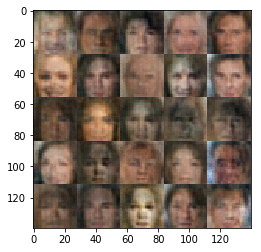

Epoch 1/1... Discriminator Loss: 0.4690... Generator Loss: 6.3310
Epoch 1/1... Discriminator Loss: 0.5154... Generator Loss: 3.7287
Epoch 1/1... Discriminator Loss: 0.5649... Generator Loss: 5.1571
Epoch 1/1... Discriminator Loss: 0.8957... Generator Loss: 4.6753
Epoch 1/1... Discriminator Loss: 0.4464... Generator Loss: 8.4032
Epoch 1/1... Discriminator Loss: 0.4128... Generator Loss: 4.8276
Epoch 1/1... Discriminator Loss: 0.5545... Generator Loss: 3.1758
Epoch 1/1... Discriminator Loss: 0.4979... Generator Loss: 5.6676
Epoch 1/1... Discriminator Loss: 0.5406... Generator Loss: 2.8804
Epoch 1/1... Discriminator Loss: 0.4302... Generator Loss: 4.2358


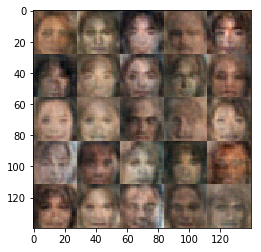

Epoch 1/1... Discriminator Loss: 0.5085... Generator Loss: 4.6124
Epoch 1/1... Discriminator Loss: 0.4766... Generator Loss: 4.3803
Epoch 1/1... Discriminator Loss: 0.4542... Generator Loss: 5.2768
Epoch 1/1... Discriminator Loss: 0.4495... Generator Loss: 12.6281
Epoch 1/1... Discriminator Loss: 0.8028... Generator Loss: 1.1386
Epoch 1/1... Discriminator Loss: 0.4296... Generator Loss: 7.4599
Epoch 1/1... Discriminator Loss: 0.5072... Generator Loss: 4.3791
Epoch 1/1... Discriminator Loss: 0.6835... Generator Loss: 1.5555
Epoch 1/1... Discriminator Loss: 0.4871... Generator Loss: 3.4280
Epoch 1/1... Discriminator Loss: 0.5567... Generator Loss: 2.6913


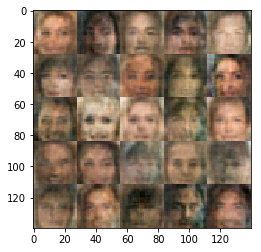

Epoch 1/1... Discriminator Loss: 0.4662... Generator Loss: 3.9926
Epoch 1/1... Discriminator Loss: 0.4063... Generator Loss: 4.7815
Epoch 1/1... Discriminator Loss: 0.4957... Generator Loss: 3.4914
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.7144
Epoch 1/1... Discriminator Loss: 0.4532... Generator Loss: 5.5655
Epoch 1/1... Discriminator Loss: 0.4511... Generator Loss: 4.6089
Epoch 1/1... Discriminator Loss: 0.8691... Generator Loss: 1.1896
Epoch 1/1... Discriminator Loss: 0.4648... Generator Loss: 6.8282
Epoch 1/1... Discriminator Loss: 0.4788... Generator Loss: 3.2035
Epoch 1/1... Discriminator Loss: 0.4564... Generator Loss: 5.2075


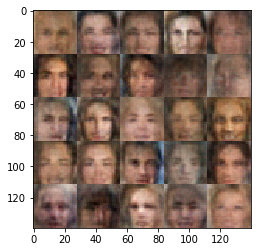

Epoch 1/1... Discriminator Loss: 0.4589... Generator Loss: 7.9806
Epoch 1/1... Discriminator Loss: 1.1136... Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 0.5201... Generator Loss: 3.6092
Epoch 1/1... Discriminator Loss: 0.4964... Generator Loss: 6.6796
Epoch 1/1... Discriminator Loss: 0.4163... Generator Loss: 5.4752
Epoch 1/1... Discriminator Loss: 0.5799... Generator Loss: 2.7077
Epoch 1/1... Discriminator Loss: 0.4729... Generator Loss: 2.4775
Epoch 1/1... Discriminator Loss: 0.4273... Generator Loss: 4.1811
Epoch 1/1... Discriminator Loss: 0.8021... Generator Loss: 1.2248
Epoch 1/1... Discriminator Loss: 0.4587... Generator Loss: 3.1836


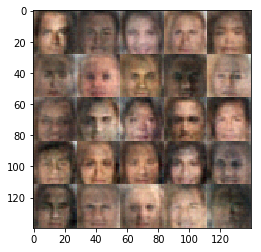

Epoch 1/1... Discriminator Loss: 0.4435... Generator Loss: 7.6377
Epoch 1/1... Discriminator Loss: 0.5050... Generator Loss: 1.9251
Epoch 1/1... Discriminator Loss: 0.4869... Generator Loss: 4.1164
Epoch 1/1... Discriminator Loss: 0.4497... Generator Loss: 5.9373
Epoch 1/1... Discriminator Loss: 0.4725... Generator Loss: 6.0904
Epoch 1/1... Discriminator Loss: 0.5006... Generator Loss: 4.7131
Epoch 1/1... Discriminator Loss: 0.4842... Generator Loss: 5.1000
Epoch 1/1... Discriminator Loss: 0.4753... Generator Loss: 5.5470
Epoch 1/1... Discriminator Loss: 0.4494... Generator Loss: 5.8950
Epoch 1/1... Discriminator Loss: 0.4747... Generator Loss: 3.9250


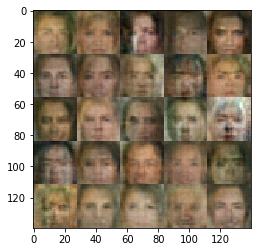

Epoch 1/1... Discriminator Loss: 0.3987... Generator Loss: 6.4054
Epoch 1/1... Discriminator Loss: 0.4653... Generator Loss: 4.9335
Epoch 1/1... Discriminator Loss: 0.4072... Generator Loss: 5.5804
Epoch 1/1... Discriminator Loss: 0.4962... Generator Loss: 3.1076
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 3.8440
Epoch 1/1... Discriminator Loss: 0.4785... Generator Loss: 8.1975
Epoch 1/1... Discriminator Loss: 0.4819... Generator Loss: 6.5336
Epoch 1/1... Discriminator Loss: 0.5140... Generator Loss: 8.8964
Epoch 1/1... Discriminator Loss: 0.3837... Generator Loss: 4.0362
Epoch 1/1... Discriminator Loss: 0.5645... Generator Loss: 2.1943


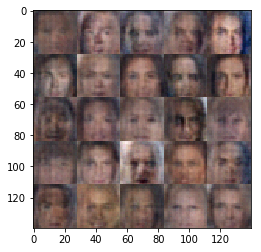

Epoch 1/1... Discriminator Loss: 0.4932... Generator Loss: 2.5196
Epoch 1/1... Discriminator Loss: 0.5092... Generator Loss: 6.8710
Epoch 1/1... Discriminator Loss: 0.8018... Generator Loss: 1.1805
Epoch 1/1... Discriminator Loss: 0.4853... Generator Loss: 3.3674
Epoch 1/1... Discriminator Loss: 0.4989... Generator Loss: 8.1447
Epoch 1/1... Discriminator Loss: 0.4695... Generator Loss: 5.4843
Epoch 1/1... Discriminator Loss: 0.5404... Generator Loss: 3.2450
Epoch 1/1... Discriminator Loss: 0.8100... Generator Loss: 1.2083
Epoch 1/1... Discriminator Loss: 0.5680... Generator Loss: 2.6305
Epoch 1/1... Discriminator Loss: 0.4574... Generator Loss: 5.7250


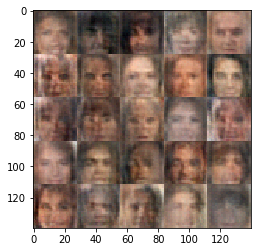

Epoch 1/1... Discriminator Loss: 0.7417... Generator Loss: 11.2244
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 1.1991
Epoch 1/1... Discriminator Loss: 3.7808... Generator Loss: 7.3004
Epoch 1/1... Discriminator Loss: 0.8336... Generator Loss: 1.2854
Epoch 1/1... Discriminator Loss: 0.5990... Generator Loss: 1.6626
Epoch 1/1... Discriminator Loss: 0.5167... Generator Loss: 2.1242
Epoch 1/1... Discriminator Loss: 0.4608... Generator Loss: 2.6087
Epoch 1/1... Discriminator Loss: 0.7434... Generator Loss: 1.3404
Epoch 1/1... Discriminator Loss: 0.5358... Generator Loss: 5.5194
Epoch 1/1... Discriminator Loss: 0.4654... Generator Loss: 6.3558


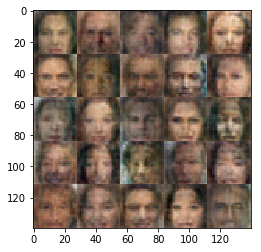

Epoch 1/1... Discriminator Loss: 0.4245... Generator Loss: 3.3020
Epoch 1/1... Discriminator Loss: 0.5035... Generator Loss: 3.4243
Epoch 1/1... Discriminator Loss: 0.4667... Generator Loss: 6.7742
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 1.0677
Epoch 1/1... Discriminator Loss: 0.4318... Generator Loss: 4.4322
Epoch 1/1... Discriminator Loss: 0.4369... Generator Loss: 7.8954
Epoch 1/1... Discriminator Loss: 0.5264... Generator Loss: 3.0141
Epoch 1/1... Discriminator Loss: 0.5477... Generator Loss: 3.0835
Epoch 1/1... Discriminator Loss: 0.5400... Generator Loss: 6.7202
Epoch 1/1... Discriminator Loss: 0.3881... Generator Loss: 9.3736


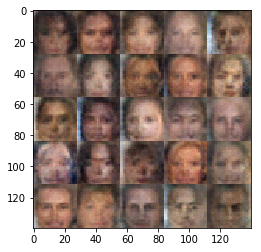

Epoch 1/1... Discriminator Loss: 0.4078... Generator Loss: 5.9818
Epoch 1/1... Discriminator Loss: 0.4060... Generator Loss: 5.6524
Epoch 1/1... Discriminator Loss: 0.4338... Generator Loss: 9.8297
Epoch 1/1... Discriminator Loss: 0.5611... Generator Loss: 2.4935
Epoch 1/1... Discriminator Loss: 0.7945... Generator Loss: 1.3012
Epoch 1/1... Discriminator Loss: 0.6743... Generator Loss: 1.6233
Epoch 1/1... Discriminator Loss: 0.6313... Generator Loss: 1.6624


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.